In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import regularizers


In [ ]:
# Load the MNIST dataset (images and labels)
(X_train, _), (X_test, _) = mnist.load_data()

# Normalize pixel values to the range [0, 1] and flatten the images
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

print(f'Training data shape: {X_train.shape}')
print(f'Testing data shape: {X_test.shape}')

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 784)
Testing data shape: (10000, 784)


In [ ]:
# Define the size of the encoding (compressed) layer
encoding_dim = 32  # 32 floats --> compression factor of 24.5, considering 784 input features

# Input placeholder
input_img = Input(shape=(784,))

# "Encoder" layers
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

# "Decoder" layers
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)  # Sigmoid for output in range [0, 1]

# Autoencoder model that maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Display the summary of the autoencoder
autoencoder.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 784)                 │         101,136 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 222,384 (868.69 KB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the autoencoder for 50 epochs with batch size of 256 and validation split of 20%
history = autoencoder.fit(X_train, X_train,
                          epochs=50,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(X_test, X_test),
                          verbose=2)


Epoch 1/50
235/235 - 7s - 29ms/step - loss: 0.2392 - val_loss: 0.1688
Epoch 2/50
235/235 - 4s - 18ms/step - loss: 0.1499 - val_loss: 0.1357
Epoch 3/50
235/235 - 3s - 15ms/step - loss: 0.1300 - val_loss: 0.1224
Epoch 4/50
235/235 - 3s - 15ms/step - loss: 0.1203 - val_loss: 0.1156
Epoch 5/50
235/235 - 5s - 21ms/step - loss: 0.1150 - val_loss: 0.1115
Epoch 6/50
235/235 - 4s - 17ms/step - loss: 0.1108 - val_loss: 0.1076
Epoch 7/50
235/235 - 3s - 15ms/step - loss: 0.1073 - val_loss: 0.1045
Epoch 8/50
235/235 - 4s - 19ms/step - loss: 0.1044 - val_loss: 0.1018
Epoch 9/50
235/235 - 4s - 19ms/step - loss: 0.1021 - val_loss: 0.0996
Epoch 10/50
235/235 - 4s - 15ms/step - loss: 0.1002 - val_loss: 0.0981
Epoch 11/50
235/235 - 6s - 27ms/step - loss: 0.0987 - val_loss: 0.0969
Epoch 12/50
235/235 - 4s - 16ms/step - loss: 0.0974 - val_loss: 0.0958
Epoch 13/50
235/235 - 5s - 21ms/step - loss: 0.0965 - val_loss: 0.0957
Epoch 14/50
235/235 - 5s - 21ms/step - loss: 0.0956 - val_loss: 0.0940
Epoch 15/50
235

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


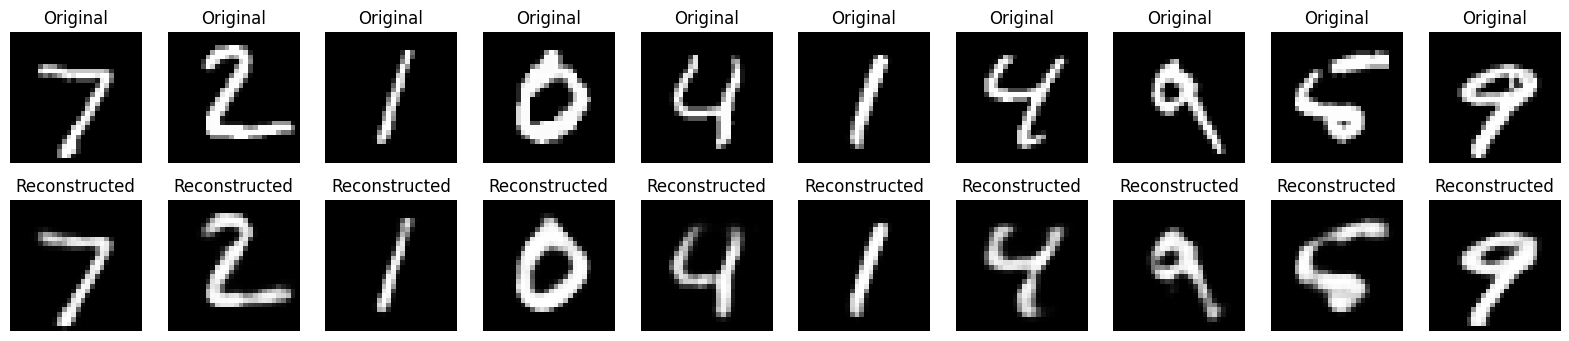

In [ ]:
# Encode and decode some digits from the test set
decoded_imgs = autoencoder.predict(X_test)

# Display original and reconstructed images side by side for comparison
n = 10  # How many digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')
plt.show()
